# Data Analysis
## Movie Viewing

In [115]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [116]:
k_movie = pd.read_csv('k_movie_2.csv')

In [117]:
k_movie.columns

Index(['MOVIE_NM', 'DRCTR_NM', 'MAKR_NM', 'DISTB_CMPNY_NM', 'OPN_DE',
       'MOVIE_TY_NM', 'MOVIE_STLE_NM', 'NLTY_NM', 'TOT_SCRN_CO',
       'VIEWNG_NMPR_CO', 'SEOUL_VIEWNG_NMPR_CO', 'GENRE_NM', 'GRAD_NM',
       'MOVIE_SDIV_NM', 'CRITIC_RT', 'VIEWER_RT', 'YEAR', 'MONTH',
       'DISTB_CMPNY_COUNT', 'SUCCESS'],
      dtype='object')

* X-features는 모든 features

In [109]:
data = k_movie
data['MOVIE_SDIV_NM'] = data['MOVIE_SDIV_NM'].map({'일반영화':1,'독립/예술영화':0})
data['GRAD_NM'] = data['GRAD_NM'].map({'전체관람가':2,'15세이상관람가':1, '12세이상관람가':0})
data['GENRE_NM'] = data['GENRE_NM'].map({'드라마': 17, '다큐멘터리': 16, '코미디': 15, '미스터리': 14, '범죄': 13,'멜로/로맨스': 12, '스릴러': 11, '어드벤처': 10, '애니메이션': 9, '사극': 8, '기타': 7, '액션': 6,'공포(호러)': 5, '판타지': 4, '공연': 3, '가족': 2, '뮤지컬': 1, 'SF': 0})
data['MOVIE_STLE_NM'] = data['MOVIE_STLE_NM'].map({'장편':2,'단편':1, '옴니버스':0})

#영화 형태(장편, 단편, 옴니버스), 총 스크린 수, 서울 관람 인원 수, 장르명, 몇 세 이용가인지, 영화 종류(일반, 독립), 평론가 평점, 네티즌 평점, 영화 개봉 연도, 영화 개봉 월, 유통회사 수
X_features = data[['MOVIE_STLE_NM', 'TOT_SCRN_CO', 'SEOUL_VIEWNG_NMPR_CO', 'GENRE_NM', 'GRAD_NM', 'MOVIE_SDIV_NM', 'CRITIC_RT',	'VIEWER_RT', 'YEAR', 'MONTH', 'DISTB_CMPNY_COUNT']]
y_target = data.iloc[:,-1]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
print("accuracy:%.4f"%metrics.accuracy_score(y_test, y_predict))
print("precision:%.4f"%metrics.precision_score(y_test, y_predict)) #정밀도
print("recall:%.4f"%metrics.recall_score(y_test, y_predict)) #재현율
print("f1:%.4f"%metrics.f1_score(y_test, y_predict)) #정밀도와 재현율의 평균
print("auc:%.4f"%metrics.roc_auc_score(y_test, pred_proba)) #auroc

accuracy:0.9537
precision:0.9804
recall:0.9259
f1:0.9524
auc:0.9942


### [Logistic Regression]

* X_features는 select된 features

In [118]:
data = k_movie
data['MOVIE_SDIV_NM'] = data['MOVIE_SDIV_NM'].map({'일반영화':1,'독립/예술영화':0})
data['GRAD_NM'] = data['GRAD_NM'].map({'전체관람가':2,'15세이상관람가':1, '12세이상관람가':0})
data['GENRE_NM'] = data['GENRE_NM'].map({'드라마': 17, '다큐멘터리': 16, '코미디': 15, '미스터리': 14, '범죄': 13,'멜로/로맨스': 12, '스릴러': 11, '어드벤처': 10, '애니메이션': 9, '사극': 8, '기타': 7, '액션': 6,'공포(호러)': 5, '판타지': 4, '공연': 3, '가족': 2, '뮤지컬': 1, 'SF': 0})
data['MOVIE_STLE_NM'] = data['MOVIE_STLE_NM'].map({'장편':2,'단편':1, '옴니버스':0})


In [119]:
X_features = data[['MOVIE_STLE_NM', 'TOT_SCRN_CO', 'SEOUL_VIEWNG_NMPR_CO', 'GENRE_NM', 'MOVIE_SDIV_NM', 'CRITIC_RT', 'VIEWER_RT', 'YEAR']]
y_target = data.iloc[:,-1]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
print("accuracy:%.4f"%metrics.accuracy_score(y_test, y_predict))
print("precision:%.4f"%metrics.precision_score(y_test, y_predict)) #정밀도
print("recall:%.4f"%metrics.recall_score(y_test, y_predict)) #재현율
print("f1:%.4f"%metrics.f1_score(y_test, y_predict)) #정밀도와 재현율의 평균
print("auc:%.4f"%metrics.roc_auc_score(y_test, pred_proba)) #auroc

accuracy:0.9630
precision:1.0000
recall:0.9259
f1:0.9615
auc:0.9952


* 성능이 정확도 기준 0.01 증가

### [Dimension Reduction]

In [122]:
k_movie = data.astype({'MOVIE_TY_NM':'category', 'MOVIE_STLE_NM':'category', 'GENRE_NM':'category', 'GRAD_NM':'category', 'MOVIE_SDIV_NM':'category',
                         'SUCCESS':'category', 'YEAR':'category', 'MONTH':'category'})
k_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MOVIE_NM              358 non-null    object  
 1   DRCTR_NM              358 non-null    object  
 2   MAKR_NM               358 non-null    object  
 3   DISTB_CMPNY_NM        358 non-null    object  
 4   OPN_DE                358 non-null    object  
 5   MOVIE_TY_NM           358 non-null    category
 6   MOVIE_STLE_NM         358 non-null    category
 7   NLTY_NM               358 non-null    object  
 8   TOT_SCRN_CO           358 non-null    float64 
 9   VIEWNG_NMPR_CO        358 non-null    float64 
 10  SEOUL_VIEWNG_NMPR_CO  358 non-null    float64 
 11  GENRE_NM              358 non-null    category
 12  GRAD_NM               358 non-null    category
 13  MOVIE_SDIV_NM         358 non-null    category
 14  CRITIC_RT             358 non-null    float64 
 15  VIEWER

<AxesSubplot:>

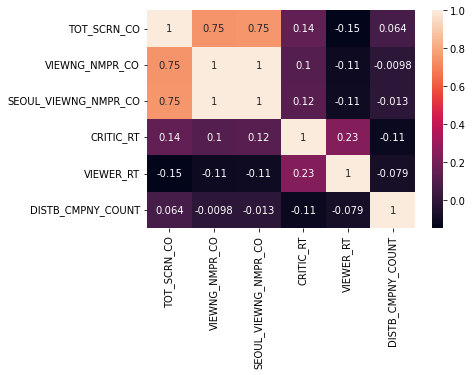

In [123]:
corr = k_movie.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2g')

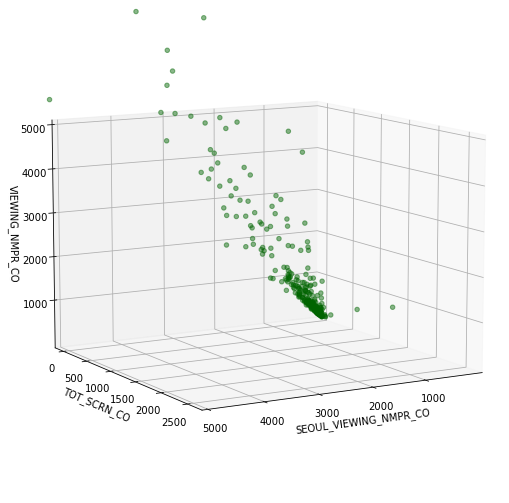

In [124]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(k_movie['SEOUL_VIEWNG_NMPR_CO'], k_movie['TOT_SCRN_CO'], k_movie['VIEWNG_NMPR_CO'], c = 'darkgreen')
ax.set_xlabel('SEOUL_VIEWING_NMPR_CO')
ax.set_xlim([1, 5000]) #시각화를 용이하게 하기 위해 관객 수 제한
ax.set_ylabel('TOT_SCRN_CO')
ax.set_zlabel('VIEWING_NMPR_CO')
ax.set_zlim([1, 5000])
ax.view_init(10, 60)

- 총 스크린 수와 서울 관람객 수 사이 상관관계 높음
- 따라서, feature extraction - PCA or feature selection : tot_scrn_co 제거

In [125]:
X_features = X_features.drop(['TOT_SCRN_CO'], axis=1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

In [127]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# k_movie_cols_scaled = scaler.fit_transform(X_train)

# pca = PCA(n_components=9)
# pca.fit(k_movie_cols_scaled)
# print(pca.explained_variance_ratio_)

In [128]:
print("accuracy:%.4f"%metrics.accuracy_score(y_test, y_predict))
print("precision:%.4f"%metrics.precision_score(y_test, y_predict)) #정밀도
print("recall:%.4f"%metrics.recall_score(y_test, y_predict)) #재현율
print("f1:%.4f"%metrics.f1_score(y_test, y_predict)) #정밀도와 재현율의 평균
print("auc:%.4f"%metrics.roc_auc_score(y_test, pred_proba)) #auroc

accuracy:0.9722
precision:1.0000
recall:0.9444
f1:0.9714
auc:0.9962


- 성능이 (정확도 기준) 0.01 증가